In [ ]:
import os

In [ ]:
Root='/content/drive/MyDrive/Deep Learning 19MAM65'
os.chdir(Root)

In [ ]:
pwd

'/content/drive/MyDrive/Deep Learning 19MAM65'

importing the libraries

In [ ]:
!pip install -q keras
import keras

In [ ]:
!pip install keras 

In [ ]:
!pip install np_utils

     |████████████████████████████████| 61 kB 548 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=f5370126bc4c86a04cf2427bd916b6a5cf6c339927702ce23b91f733c9b9d186
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%load_ext tensorboard

In [ ]:
# importing sequential model from keras.models
from tensorflow.keras.models import Sequential
# importing different layers and activations from keras.layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Add
from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
from keras.models import load_model

loading the dataset

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


Preprocessing

In [ ]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

studying the feature

In [ ]:
X_train_full.shape

(60000, 28, 28)

visualization

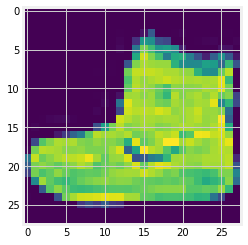

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train_full[0])

In [ ]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
#X_train = X_train_full.reshape(X_train_full.shape[0], 28, 28,1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
#Checking first 10 image labels
y_train_full[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Neural network Architecture

In [ ]:
LAYERS = [
         tf.keras.layers.Flatten(input_shape=[28, 28]),
         tf.keras.layers.Dense(30, activation="relu"),
         tf.keras.layers.Dense(25, activation="relu"),
         tf.keras.layers.Dense(20, activation="relu"),
         tf.keras.layers.Dense(10,activation="softmax")

]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 30)                23550     
                                                                 
 dense_13 (Dense)            (None, 25)                775       
                                                                 
 dense_14 (Dense)            (None, 20)                520       
                                                                 
 dense_15 (Dense)            (None, 10)                210       
                                                                 
Total params: 25,055
Trainable params: 25,055
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.9332 - accuracy: 0.6755 - val_loss: 0.5631 - val_accuracy: 0.8044
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5449 - accuracy: 0.8079 - val_loss: 0.4914 - val_accuracy: 0.8306
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4882 - accuracy: 0.8289 - val_loss: 0.4703 - val_accuracy: 0.8320
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4571 - accuracy: 0.8384 - val_loss: 0.4244 - val_accuracy: 0.8538
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4355 - accuracy: 0.8468 - val_loss: 0.4241 - val_accuracy: 0.8486
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4187 - accuracy: 0.8525 - val_loss: 0.4234 - val_accuracy: 0.8486
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4029 - accuracy: 0.8586 - val_loss: 0.4045 - val_accuracy:

In [ ]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS_fashion_minist"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [ ]:
UNIQUE_PATH = model.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS_fashion_minist/Model_2022_03_01_14_40_20_.h5


In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.933246,0.675473,0.563051,0.8044
1,0.544910,0.807909,0.491358,0.8306
2,0.488245,0.828945,0.470304,0.8320
3,0.457124,0.838382,0.424441,0.8538
4,0.435522,0.846800,0.424082,0.8486
5,0.418749,0.852527,0.423401,0.8486
6,0.402944,0.858582,0.404506,0.8534
7,0.392439,0.861327,0.427829,0.8422
8,0.381776,0.864455,0.399810,0.8598
9,0.372911,0.866782,0.401754,0.8504


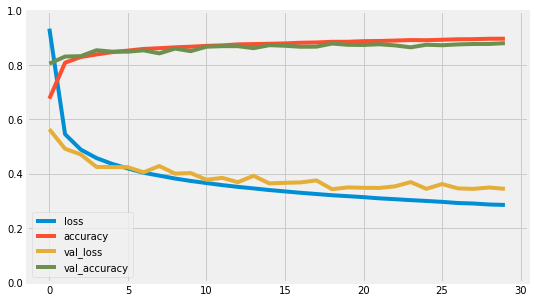

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluation

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3744 - accuracy: 0.8695


[0.3744426667690277, 0.8694999814033508]

Hence we can see train accuracy as 87.98 % and test accuracy as 86.94%

prediction for test image

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
for i in range(len(y_pred)):
  if(y_pred[i]==0):
    print("T-shirt/top")

  elif(y_pred[i]==1):
    print("Trouser")

  elif(y_pred[i]==2):
    print("Pullover")

  elif(y_pred[i]==3):
    print("Dress")
  elif(y_pred[i]==4):
    print("Coat")

  elif(y_pred[i]==5):
    print("Sandal")

  elif(y_pred[i]==6):
    print("Shirt")

  elif(y_pred[i]==7):
    print("Sneaker")

  elif(y_pred[i]==8):
    print("Bag")

  else:
    print("Ankle boot")

Ankle boot
Pullover
Trouser


In [ ]:
y_test_new = y_test[:3]

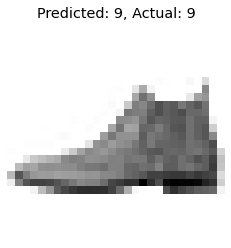

------------------------------------------------------------


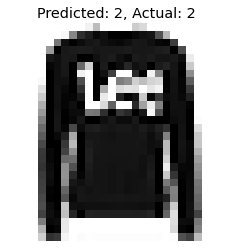

------------------------------------------------------------


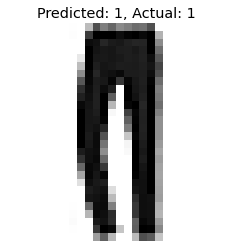

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

prediction with new input image

loading the saved model

In [ ]:
model_1=tf.keras.models.load_model('/content/drive/MyDrive/Deep Learning 19MAM65/SAVED_MODELS_fashion_minist/Model_2022_03_01_14_40_20_.h5')

In [ ]:
from keras.preprocessing import image
import numpy as np
test_img = image.load_img('/content/drive/MyDrive/Deep Learning 19MAM65/fashion_minist_test_img.png', target_size=(28, 28))
test_img = image.img_to_array(test_img)
test_img = test_img[:,:,1].reshape(1,28,28,1)
test_img = test_img/255
result = np.argmax(model.predict(test_img), axis=-1)
#print(result[0])
if(result[0]==0):
    print("T-shirt/top")

elif(result[0]==1):
    print("Trouser")

elif(result[0]==2):
    print("Pullover")

elif(result[0]==3):
    print("Dress")
elif(result[0]==4):
    print("Coat")

elif(result[0]==5):
    print("Sandal")

elif(result[0]==6):
    print("Shirt")

elif(result[0]==7):
    print("Sneaker")

elif(result[0]==8):
    print("Bag")

else:
    print("Ankle boot")

Pullover
